In [5]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [6]:
directory = "/Users/bryant.chhun/Desktop/Data/2019_04_08_TetraSpec_PSF_6"

sample = "/Pos0"

outfolder = "/Users/bryant.chhun/Desktop/Data/2019_04_08_TetraSpec_PSF_6/"

In [7]:
files = [name for name in os.listdir(directory+sample) 
              if os.path.isfile(os.path.join(directory+sample, name))]


In [4]:
inputChann = ['Zyla_405_Widefield','Zyla_488_Widefield', 'Zyla_561_Widefield', 'Zyla_637_Widefield']

In [6]:
# generate 3d tiff files (PSF files)

for chan in inputChann:
    tiffstack = []
    
    # pull out images that string match chan
    imglist_by_chan = [directory+sample+"/"+img for img in files if chan in img]
    imglist_by_chan.sort(reverse=False)
    
    # write sorted images to array
    for Image in imglist_by_chan:
        ar = tifffile.imread(Image)
        tiffstack.append(ar)
    tiffstack = np.asarray(tiffstack)
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    outfilename = outfolder+"/"+chan+"_tiffstack.tif"
    # cv2.imwrite(outfilename, np.asarray(tiffstack))
    tifffile.imsave(outfilename, tiffstack)


In [82]:
# load a 3d tiff file (bead stack)

# stack = tifffile.imread('/Users/bryant.chhun/Desktop/Data/2019_04_08_TetraSpec_PSF_6/Zyla_405_Widefield_tiffstack.tif')
# stack = tifffile.imread('/Users/bryant.chhun/Desktop/Data/2019_04_08_TetraSpec_PSF_6/Zyla_488_Widefield_tiffstack.tif')
# stack = tifffile.imread('/Users/bryant.chhun/Desktop/Data/2019_04_08_TetraSpec_PSF_6/Zyla_561_Widefield_tiffstack.tif')
stack = tifffile.imread('/Users/bryant.chhun/Desktop/Data/2019_04_08_TetraSpec_PSF_6/Zyla_637_Widefield_tiffstack.tif')



In [68]:
def trimBorders(playdata, radius):
    copydata = deepcopy(playdata)
    mindat = copydata.min()
    copydata[0:radius].fill(mindat)
    copydata[-radius:-1].fill(mindat)
    copydata[:,0:radius].fill(mindat)
    copydata[:,-radius:-1].fill(mindat)
    return copydata
    
def triscutData(playdata, size):
    copydata = deepcopy(playdata)
    # copydata = np.delete(copydata, np.s_[-size:-1],0)
    # copydata = np.delete(copydata, np.s_[-size:-1],1)
    # copydata = np.delete(copydata, np.s_[0:size],0)
    # copydata = np.delete(copydata, np.s_[0:size],1)
    return copydata[size:-size, size:-size]

def IDSM(inputdata, PeakIntensity, radius):
    std_input = np.std(inputdata)
    max_data = inputdata.max()
    mean_data = inputdata.mean()
    
    playdata = deepcopy(inputdata)
    playdata = triscutData(playdata, 512)
    playdata = trimBorders(playdata, radius)
    extractedList = []
    
    while (max_data - mean_data > std_input * PeakIntensity):
        max_coord = np.unravel_index(playdata.argmax(), playdata.shape)
        
        # extract a radius around this location
        # check that the molecule is not at the edge
        if(playdata.shape[0] - radius > max_coord[0] > radius
            and playdata.shape[1] - radius > max_coord[1] > radius):
            extraction = deepcopy(playdata[ max_coord[0]-radius:max_coord[0]+radius+1 , max_coord[1]-radius:max_coord[1]+radius+1])
        else:
            print("edge molecule detected, replacing molecule but not extracting")
            playdata[ max_coord[0]-radius:max_coord[0]+radius+1 , max_coord[1]-radius:max_coord[1]+radius+1].fill(extractedList[-1].min())
            
        print("extracting molecule # = %s" % (len(extractedList)+1))
        # print("max data = %s, mean_data = %s\nstd_input = %s, PI = %s\nmax-mean = %s, std*PI = %s\ncoord = (%s, %s)" % (max_data, mean_data, std_input, PeakIntensity, max_data - mean_data, std_input * PeakIntensity, max_coord[0], max_coord[1]))
        # print("convergence = %s" % ((max_data - mean_data) - (std_input * PeakIntensity)))
        # print("extraction shape = %s, extraction min = %s" % (extraction.shape, extraction.min()))
        # print("\n")
        
        extractedList.append(extraction)
        
        playdata[ max_coord[0]-radius:max_coord[0]+radius+1 , max_coord[1]-radius:max_coord[1]+radius+1].fill(extraction.min())
            
        #update image data to reflect extracted set
        std_input = np.std(playdata)
        max_data = playdata.max()
        mean_data = playdata.mean()
            
    return extractedList


In [83]:
# create list of z-planes
# each list element is an ndarray of shape (N, x, y), where N is the number of single molecules extracted

newstack = []
for zidx in range(0, stack.shape[0]):
    print("=====================================")
    print("========== z=%s stack =============="%zidx)
    newstack.append(np.asarray(IDSM(stack[zidx], 9, 32)))


========== z=0 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22


extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49


extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74


extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102


edge molecule detected, replacing molecule but not extracting
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128


extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
========== z=1 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
========== z=2 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
========== z=3 stack ==============
extracting molecule # = 1
extracting molecule # = 2


extracting molecule # = 3
extracting molecule # = 4
========== z=4 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
========== z=5 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9


extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
========== z=6 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16


extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47


extracting molecule # = 48
extracting molecule # = 49
========== z=7 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25


extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 51
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56


extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86


extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117


extracting molecule # = 118
========== z=8 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27


extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58


extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89


extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120


extracting molecule # = 121
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151


extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
========== z=9 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19


extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50


extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81


extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110


extracting molecule # = 111
extracting molecule # = 112
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141


extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172


extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177
extracting molecule # = 178
extracting molecule # = 179
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
========== z=10 stack ==============


extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30


extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60


extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90
extracting molecule # = 91


extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122


extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
extracting molecule # = 137
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151


extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176


extracting molecule # = 177
extracting molecule # = 178
extracting molecule # = 179
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207


extracting molecule # = 208
extracting molecule # = 209
extracting molecule # = 210
extracting molecule # = 211
extracting molecule # = 212
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218
========== z=11 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16


extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47


extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78


extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109


extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
extracting molecule # = 137


extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167


extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177
extracting molecule # = 178
extracting molecule # = 179
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198


extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207
extracting molecule # = 208
extracting molecule # = 209
extracting molecule # = 210
extracting molecule # = 211
extracting molecule # = 212
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218
extracting molecule # = 219
extracting molecule # = 220
extracting molecule # = 221
extracting molecule # = 222
extracting molecule # = 223
extracting molecule # = 224
extracting molecule # = 225
extracting molecule # = 226
extracting molecule # = 227
extracting molecule # = 228


extracting molecule # = 229
extracting molecule # = 230
extracting molecule # = 231
extracting molecule # = 232
========== z=12 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22


extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53


extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84


extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114


extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 136
extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144


extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174


extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 178
extracting molecule # = 179
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204


extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207
extracting molecule # = 208
extracting molecule # = 209
extracting molecule # = 210
extracting molecule # = 211
extracting molecule # = 212
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218
extracting molecule # = 219
extracting molecule # = 220
extracting molecule # = 221
extracting molecule # = 222
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 223
extracting molecule # = 224
extracting molecule # = 225
extracting molecule # = 226
extracting molecule # = 227
extracting molecule # = 228
extracting molecule # = 229
extracting molecule # = 230
extracting molecule # = 231
extracting molecule # = 232
extracting molecule # = 233
extracting molecule # = 234
========== z=13 stack ==============


extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30


extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61


extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90


extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121


extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152


extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177
extracting molecule # = 178
extracting molecule # = 179
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182


extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207
extracting molecule # = 208
extracting molecule # = 209
extracting molecule # = 210
extracting molecule # = 211


extracting molecule # = 212
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218
extracting molecule # = 219
extracting molecule # = 220
extracting molecule # = 221
extracting molecule # = 222
extracting molecule # = 223
extracting molecule # = 224
extracting molecule # = 225
extracting molecule # = 226
extracting molecule # = 227
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 228
extracting molecule # = 229
extracting molecule # = 230
extracting molecule # = 231
extracting molecule # = 232
extracting molecule # = 233
extracting molecule # = 234
extracting molecule # = 235
extracting molecule # = 236
========== z=14 stack ==============
extracting molecule # = 1


extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31


extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59


extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89


extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119


extracting molecule # = 120
extracting molecule # = 121
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148


extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 177
extracting molecule # = 178


extracting molecule # = 179
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207
extracting molecule # = 208


extracting molecule # = 209
extracting molecule # = 210
extracting molecule # = 211
extracting molecule # = 212
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218
extracting molecule # = 219
extracting molecule # = 220
extracting molecule # = 221
extracting molecule # = 222
extracting molecule # = 223
extracting molecule # = 224
extracting molecule # = 225
extracting molecule # = 226
extracting molecule # = 227
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 228
extracting molecule # = 229
extracting molecule # = 230
extracting molecule # = 231
extracting molecule # = 232
extracting molecule # = 233
extracting molecule # = 234
extracting molecule # = 235
extracting molecule # = 236
extracting molecule # = 237
========== z=15 stack ==============


extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30


extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60


extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89


extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119


edge molecule detected, replacing molecule but not extracting
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 148


extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177


extracting molecule # = 178
extracting molecule # = 179
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207


extracting molecule # = 208
extracting molecule # = 209
extracting molecule # = 210
extracting molecule # = 211
extracting molecule # = 212
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218
extracting molecule # = 219
extracting molecule # = 220
extracting molecule # = 221
extracting molecule # = 222
extracting molecule # = 223
extracting molecule # = 224
extracting molecule # = 225
extracting molecule # = 226
extracting molecule # = 227
extracting molecule # = 228
extracting molecule # = 229
extracting molecule # = 230
extracting molecule # = 231
extracting molecule # = 232
extracting molecule # = 233
extracting molecule # = 234
extracting molecule # = 235
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 236


extracting molecule # = 237
extracting molecule # = 238
extracting molecule # = 239
extracting molecule # = 240
extracting molecule # = 241
========== z=16 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20


extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49


extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 62
extracting molecule # = 63
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78


extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108


extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
extracting molecule # = 137


extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166


extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177
extracting molecule # = 178
extracting molecule # = 179
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196


extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207
extracting molecule # = 208
extracting molecule # = 209
extracting molecule # = 210
extracting molecule # = 211
extracting molecule # = 212
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218
extracting molecule # = 219
extracting molecule # = 220
extracting molecule # = 221
extracting molecule # = 222
extracting molecule # = 223
extracting molecule # = 224
extracting molecule # = 225


extracting molecule # = 226
extracting molecule # = 227
extracting molecule # = 228
extracting molecule # = 229
extracting molecule # = 230
extracting molecule # = 231
extracting molecule # = 232
extracting molecule # = 233
extracting molecule # = 234
extracting molecule # = 235
extracting molecule # = 236
extracting molecule # = 237
extracting molecule # = 238
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 239
extracting molecule # = 240
extracting molecule # = 241
extracting molecule # = 242
extracting molecule # = 243
========== z=17 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6


extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34


extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63


edge molecule detected, replacing molecule but not extracting
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92


extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121


extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150


extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177
extracting molecule # = 178
extracting molecule # = 179


extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207


extracting molecule # = 208
extracting molecule # = 209
extracting molecule # = 210
extracting molecule # = 211
extracting molecule # = 212
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218
extracting molecule # = 219
extracting molecule # = 220
extracting molecule # = 221
extracting molecule # = 222
extracting molecule # = 223
extracting molecule # = 224
extracting molecule # = 225
extracting molecule # = 226
extracting molecule # = 227
extracting molecule # = 228
extracting molecule # = 229
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 230
extracting molecule # = 231
extracting molecule # = 232
extracting molecule # = 233
========== z=18 stack ==============


extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 27


extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53


extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80


extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107


extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136


extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163


extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177
extracting molecule # = 178
extracting molecule # = 179
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190


extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207
extracting molecule # = 208
extracting molecule # = 209
extracting molecule # = 210
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 211
extracting molecule # = 212
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218


extracting molecule # = 219
extracting molecule # = 220
extracting molecule # = 221
extracting molecule # = 222
extracting molecule # = 223
extracting molecule # = 224
extracting molecule # = 225
extracting molecule # = 226
extracting molecule # = 227
extracting molecule # = 228
extracting molecule # = 229
extracting molecule # = 230
extracting molecule # = 231
extracting molecule # = 232
========== z=19 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10


extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38


extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48
extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67


extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 76
extracting molecule # = 77
extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94


extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105
extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122


extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
extracting molecule # = 126
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131
extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149


extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157
extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177
extracting molecule # = 178
extracting molecule # = 179


extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185
extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207


extracting molecule # = 208
extracting molecule # = 209
extracting molecule # = 210
extracting molecule # = 211
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 212
extracting molecule # = 213
extracting molecule # = 214
extracting molecule # = 215
extracting molecule # = 216
extracting molecule # = 217
extracting molecule # = 218
extracting molecule # = 219
extracting molecule # = 220
extracting molecule # = 221
extracting molecule # = 222
extracting molecule # = 223
extracting molecule # = 224
extracting molecule # = 225
extracting molecule # = 226
extracting molecule # = 227
extracting molecule # = 228
extracting molecule # = 229
extracting molecule # = 230
extracting molecule # = 231
extracting molecule # = 232
extracting molecule # = 233
extracting molecule # = 234


extracting molecule # = 235
extracting molecule # = 236
extracting molecule # = 237
extracting molecule # = 238
extracting molecule # = 239
extracting molecule # = 240
========== z=20 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19


extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30
extracting molecule # = 31
extracting molecule # = 32
extracting molecule # = 33
extracting molecule # = 34
extracting molecule # = 35
extracting molecule # = 36
extracting molecule # = 37
extracting molecule # = 38
extracting molecule # = 39
extracting molecule # = 40
extracting molecule # = 41
extracting molecule # = 42
extracting molecule # = 43
extracting molecule # = 44
extracting molecule # = 45
extracting molecule # = 46
extracting molecule # = 47
extracting molecule # = 48


extracting molecule # = 49
extracting molecule # = 50
extracting molecule # = 51
extracting molecule # = 52
extracting molecule # = 53
extracting molecule # = 54
extracting molecule # = 55
extracting molecule # = 56
extracting molecule # = 57
extracting molecule # = 58
extracting molecule # = 59
extracting molecule # = 60
extracting molecule # = 61
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 62
extracting molecule # = 63
extracting molecule # = 64
extracting molecule # = 65
extracting molecule # = 66
extracting molecule # = 67
extracting molecule # = 68
extracting molecule # = 69
extracting molecule # = 70
extracting molecule # = 71
extracting molecule # = 72
extracting molecule # = 73
extracting molecule # = 74
extracting molecule # = 75
extracting molecule # = 76
extracting molecule # = 77


extracting molecule # = 78
extracting molecule # = 79
extracting molecule # = 80
extracting molecule # = 81
extracting molecule # = 82
extracting molecule # = 83
extracting molecule # = 84
extracting molecule # = 85
extracting molecule # = 86
extracting molecule # = 87
extracting molecule # = 88
extracting molecule # = 89
extracting molecule # = 90
extracting molecule # = 91
extracting molecule # = 92
extracting molecule # = 93
extracting molecule # = 94
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 95
extracting molecule # = 96
extracting molecule # = 97
extracting molecule # = 98
extracting molecule # = 99
extracting molecule # = 100
extracting molecule # = 101
extracting molecule # = 102
extracting molecule # = 103
extracting molecule # = 104
extracting molecule # = 105


extracting molecule # = 106
extracting molecule # = 107
extracting molecule # = 108
extracting molecule # = 109
extracting molecule # = 110
extracting molecule # = 111
extracting molecule # = 112
extracting molecule # = 113
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 114
extracting molecule # = 115
extracting molecule # = 116
extracting molecule # = 117
extracting molecule # = 118
extracting molecule # = 119
extracting molecule # = 120
extracting molecule # = 121
extracting molecule # = 122
extracting molecule # = 123
extracting molecule # = 124
extracting molecule # = 125
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 126
edge molecule detected, replacing molecule but not extracting
extracting molecule # = 127
extracting molecule # = 128
extracting molecule # = 129
extracting molecule # = 130
extracting molecule # = 131


extracting molecule # = 132
extracting molecule # = 133
extracting molecule # = 134
extracting molecule # = 135
extracting molecule # = 136
extracting molecule # = 137
extracting molecule # = 138
extracting molecule # = 139
extracting molecule # = 140
extracting molecule # = 141
extracting molecule # = 142
extracting molecule # = 143
extracting molecule # = 144
extracting molecule # = 145
extracting molecule # = 146
extracting molecule # = 147
extracting molecule # = 148
extracting molecule # = 149
extracting molecule # = 150
extracting molecule # = 151
extracting molecule # = 152
extracting molecule # = 153
extracting molecule # = 154
extracting molecule # = 155
extracting molecule # = 156
extracting molecule # = 157


extracting molecule # = 158
extracting molecule # = 159
extracting molecule # = 160
extracting molecule # = 161
extracting molecule # = 162
extracting molecule # = 163
extracting molecule # = 164
extracting molecule # = 165
extracting molecule # = 166
extracting molecule # = 167
extracting molecule # = 168
extracting molecule # = 169
extracting molecule # = 170
extracting molecule # = 171
extracting molecule # = 172
extracting molecule # = 173
extracting molecule # = 174
extracting molecule # = 175
extracting molecule # = 176
extracting molecule # = 177
extracting molecule # = 178
extracting molecule # = 179
extracting molecule # = 180
extracting molecule # = 181
extracting molecule # = 182
extracting molecule # = 183
extracting molecule # = 184
extracting molecule # = 185


extracting molecule # = 186
extracting molecule # = 187
extracting molecule # = 188
extracting molecule # = 189
extracting molecule # = 190
extracting molecule # = 191
extracting molecule # = 192
extracting molecule # = 193
extracting molecule # = 194
extracting molecule # = 195
extracting molecule # = 196
extracting molecule # = 197
extracting molecule # = 198
extracting molecule # = 199
extracting molecule # = 200
extracting molecule # = 201
extracting molecule # = 202
extracting molecule # = 203
extracting molecule # = 204
extracting molecule # = 205
extracting molecule # = 206
extracting molecule # = 207
extracting molecule # = 208
========== z=21 stack ==============
extracting molecule # = 1


extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
extracting molecule # = 9
extracting molecule # = 10
extracting molecule # = 11
extracting molecule # = 12
extracting molecule # = 13
extracting molecule # = 14
extracting molecule # = 15
extracting molecule # = 16
extracting molecule # = 17
extracting molecule # = 18
extracting molecule # = 19
extracting molecule # = 20
extracting molecule # = 21
extracting molecule # = 22
extracting molecule # = 23
extracting molecule # = 24
extracting molecule # = 25
extracting molecule # = 26
extracting molecule # = 27
extracting molecule # = 28
extracting molecule # = 29
extracting molecule # = 30


extracting molecule # = 31
extracting molecule # = 32
========== z=22 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
extracting molecule # = 8
========== z=23 stack ==============
extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5
extracting molecule # = 6
extracting molecule # = 7
========== z=24 stack ==============


extracting molecule # = 1
extracting molecule # = 2
extracting molecule # = 3
extracting molecule # = 4
extracting molecule # = 5


In [84]:
# average all single molecules in each z-plane 
avg_stack = []
for zidx in range(0, len(newstack)):
    avg_stack.append(np.mean(newstack[zidx], axis=0))


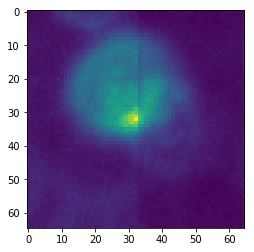

In [70]:
plt.imshow(avg_stack[22])

In [87]:
trunc_stack = avg_stack[:22]
trunc_stack = np.asarray(trunc_stack, dtype=np.uint16)[:, :-1, :-1]
trunc_stack.shape


(22, 64, 64)

In [88]:

tifffile.imsave(outfolder+"/637_64x64.tif", trunc_stack)


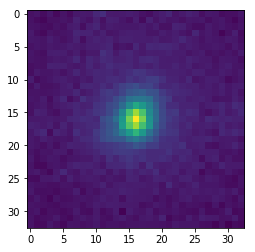